# Deep Q Learning with Atari© Space Invaders© 🕹️👾

In this notebook we'll implement an agent **that learns to play Atari© Space Invaders© using OpenAI retro as environment library.**

Our agent after 2 hours of training (as you can see it needs much more, but **for educational purposes we can see that's a good beginning**)

<img src="https://raw.githubusercontent.com/simoninithomas/Deep_reinforcement_learning_Course/master/Deep%20Q%20Learning/Space%20Invaders/assets/spaceinvaders.gif" alt="Space invaders dqn"/>



# This is a notebook from [Deep Reinforcement Learning Course with Tensorflow](https://simoninithomas.github.io/deep-rl-course/)
<img src="https://raw.githubusercontent.com/simoninithomas/Deep_reinforcement_learning_Course/master/docs/assets/img/DRLC%20Environments.png" alt="Deep Reinforcement Course"/>
<br>
<p>  Deep Reinforcement Learning Course is a free series of articles and videos tutorials 🆕 about Deep Reinforcement Learning, where **we'll learn the main algorithms (Q-learning, Deep Q Nets, Dueling Deep Q Nets, Policy Gradients, A2C, Proximal Policy Gradients…), and how to implement them with Tensorflow.**
<br><br>
    
📜The articles explain the architectures from the big picture to the mathematical details behind them.
<br>
📹 The videos explain how to build the agents with Tensorflow </b></p>
<br>
This course will give you a **solid foundation for understanding and implementing the future state of the art algorithms**. And, you'll build a strong professional portfolio by creating **agents that learn to play awesome environments**: Doom© 👹, Space invaders 👾, Outrun, Sonic the Hedgehog©, Michael Jackson’s Moonwalker, agents that will be able to navigate in 3D environments with DeepMindLab (Quake) and able to walk with Mujoco. 
<br><br>
</p> 

## 📚 The complete [Syllabus HERE](https://simoninithomas.github.io/Deep_reinforcement_learning_Course/)


## Any questions 👨‍💻
<p> If you have any questions, feel free to ask me: </p>
<p> 📧: <a href="mailto:hello@simoninithomas.com">hello@simoninithomas.com</a>  </p>
<p> Github: https://github.com/simoninithomas/Deep_reinforcement_learning_Course </p>
<p> 🌐 : https://simoninithomas.github.io/Deep_reinforcement_learning_Course/ </p>
<p> Twitter: <a href="https://twitter.com/ThomasSimonini">@ThomasSimonini</a> </p>
<p> Don't forget to <b> follow me on <a href="https://twitter.com/ThomasSimonini">twitter</a>, <a href="https://github.com/simoninithomas/Deep_reinforcement_learning_Course">github</a> and <a href="https://medium.com/@thomassimonini">Medium</a> to be alerted of the new articles that I publish </b></p>
    
## How to help  🙌
3 ways:
- **Clap our articles and like our videos a lot**:Clapping in Medium means that you really like our articles. And the more claps we have, the more our article is shared Liking our videos help them to be much more visible to the deep learning community.
- **Share and speak about our articles and videos**: By sharing our articles and videos you help us to spread the word. 
- **Improve our notebooks**: if you found a bug or **a better implementation** you can send a pull request.
<br>

## Important note 🤔
<b> You can run it on your computer but it's better to run it on GPU based services</b>, personally I use Microsoft Azure and their Deep Learning Virtual Machine (they offer 170$)
https://azuremarketplace.microsoft.com/en-us/marketplace/apps/microsoft-ads.dsvm-deep-learning
<br>
⚠️ I don't have any business relations with them. I just loved their excellent customer service.

If you have some troubles to use Microsoft Azure follow the explainations of this excellent article here (without last the part fast.ai): https://medium.com/@manikantayadunanda/setting-up-deeplearning-machine-and-fast-ai-on-azure-a22eb6bd6429

## Prerequisites 🏗️
Before diving on the notebook **you need to understand**:
- The foundations of Reinforcement learning (MC, TD, Rewards hypothesis...) [Article](https://medium.freecodecamp.org/an-introduction-to-reinforcement-learning-4339519de419)
- Q-learning [Article](https://medium.freecodecamp.org/diving-deeper-into-reinforcement-learning-with-q-learning-c18d0db58efe)
- Deep Q-Learning [Article](https://medium.freecodecamp.org/an-introduction-to-deep-q-learning-lets-play-doom-54d02d8017d8)
- In the [video version](https://www.youtube.com/watch?v=gCJyVX98KJ4)  we implemented a Deep Q-learning agent with Tensorflow that learns to play Atari Space Invaders 🕹️👾.

To make sure you can run the code smoothly, make sure you install the following packages:
- tensorflow (pip install --upgrade tensorflow)
- gym-retro (pip install --upgrade gym-retro)
- skimage (conda install -c conda-forge scikit-image)

## Step 1: Import the libraries 📚

In [74]:
import torch      # Deep Learning library
print(torch.__version__)

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


1.10.2


In [22]:
import numpy as np           # Handle matrices
import retro                 # Retro Environment
import os
import matplotlib.pyplot as plt # Display graphs

from collections import deque# Ordered collection with ends

import random

## Step 2: Create our environment 🎮
This time we use **OpenAI Retro**, a wrapper for video game emulator cores using the Libretro API to turn them into Gym environments.

<img src="http://cdn-static.denofgeek.com/sites/denofgeek/files/styles/main_wide/public/mega-drive-main.jpg?itok=aj_clOZT" style="max-width:50%" alt="Sega" /><p><i>Source: Denofgeek </i></p>

### Our environment
Our Environment is the famous game Atari Space Invaders.


In [24]:
import gym

In [76]:
# Create our environment
#env = retro.make(game='SpaceInvaders-Atari2600')
game_name ="ALE/SpaceInvaders-v5"
# 
env = gym.make(game_name, 
    obs_type='grayscale',  # ram| rgb | grayscale
    render_mode = 'human') # human | rgb_array
    
print("The size of our frame is: ", env.observation_space)
print("The action size is : ", env.action_space.n)

# First glimpse of the game
state = env.reset()

The size of our frame is:  Box(0, 255, (210, 160), uint8)
The action size is :  6


2

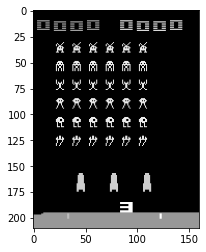

In [16]:
plt.imshow(state,cmap='gray')

## Step 3 : Define the preprocessing functions ⚙️
### preprocess_frame
Preprocessing is an important step, <b>because we want to reduce the complexity of our states to reduce the computation time needed for training.</b>
<br><br>
Our steps:
- Grayscale each of our frames (because <b> color does not add important information </b>).
- Crop the screen (in our case we remove the part below the player because it does not add any useful information)
- We normalize pixel values
- Finally we resize the preprocessed frame

In [72]:
"""
    preprocess_frame:
    Take a frame.
    Grayscale it
    Resize it.
        __________________
        |                 |
        |                 |
        |                 |
        |                 |
        |_________________|
        
        to
        _____________
        |            |
        |            |
        |            |
        |____________|
    Normalize it.
    
    return preprocessed_frame
    
    """
transform_img = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Grayscale(), 
    transforms.Resize([110,84]),
    transforms.Normalize(0,255),
    ] )

def preprocess_frame(frame):
    if frame.ndim == 3: # It is RGB image
        processed_frame = frame[8:-15, 4:-12,:]
    elif frame.ndim == 2: # it is already grayscale
        processed_frame = frame[8:-15, 4:-12]
    else:
        print('Error in frame dimension')
        print(frame)
    processed_frame = transform_img(processed_frame)
    return processed_frame

(210, 160)
133
torch.Size([1, 110, 84])
tensor(0.0020)


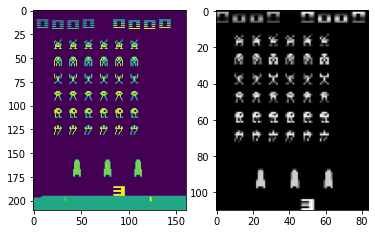

In [40]:
# Test the result of preprocessed function
print(state.shape)
print(state.max())
preprocessed_state = preprocess_frame(state)
print(preprocessed_state.shape)
print(preprocessed_state.max())
figure, axes = plt.subplots(1,2)
axes[0].imshow(state)
axes[1].imshow(preprocessed_state[0],cmap='gray')

### stack_frames
As explained in this really <a href="https://danieltakeshi.github.io/2016/11/25/frame-skipping-and-preprocessing-for-deep-q-networks-on-atari-2600-games/">  good article </a> we stack frames.

Stacking frames is really important because it helps us to **give have a sense of motion to our Neural Network.**

BUT, **we don't stack each frames, we skip 4 frames at each timestep**. This means that only every fourth frame is considered. And then, we use this frame to form the stack_frame.

**The frame skipping method is already implemented in the library.**

- First we preprocess frame
- Then we append the frame to the deque that automatically **removes the oldest frame**
- Finally we **build the stacked state**

This is how work stack:
- For the first frame, we feed 4 frames
- At each timestep, **we add the new frame to deque and then we stack them to form a new stacked frame**
- And so on
<img src="https://raw.githubusercontent.com/simoninithomas/Deep_reinforcement_learning_Course/master/DQN/Space%20Invaders/assets/stack_frames.png" alt="stack">
- If we're done, **we create a new stack with 4 new frames (because we are in a new episode)**.

In [41]:
stack_size = 4 # We stack 4 frames

# Initialize deque with zero-images one array for each image
stacked_frames  =  deque([torch.zeros((110,84), dtype=torch.int) for i in range(stack_size)], maxlen=4)

def stack_frames(stacked_frames, state, is_new_episode):
    # Preprocess frame
    frame = preprocess_frame(state)
    
    if is_new_episode:
        # Clear our stacked_frames
        stacked_frames = deque([torch.zeros((110,84), dtype=torch.int) for i in range(stack_size)], maxlen=4)
        
        # Because we're in a new episode, copy the same frame 4x
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        
        # Stack the frames
        stacked_state = np.stack(stacked_frames, axis=2)
        
    else:
        # Append frame to deque, automatically removes the oldest frame
        stacked_frames.append(frame)

        # Build the stacked state (first dimension specifies different frames)
        stacked_state = np.stack(stacked_frames, axis=2) 
    
    return stacked_state, stacked_frames

## Step 4: Set up our hyperparameters ⚗️
In this part we'll set up our different hyperparameters. But when you implement a Neural Network by yourself you will **not implement hyperparamaters at once but progressively**.

- First, you begin by defining the neural networks hyperparameters when you implement the model.
- Then, you'll add the training hyperparameters when you implement the training algorithm.

In [59]:
### PREPROCESSING HYPERPARAMETERS
stack_size = 4                 # Number of frames stacked
width, height = preprocessed_state.shape[1:]

### TRAINING HYPERPARAMETERS
total_episodes = 50            # Total episodes for training
max_steps = 50000              # Max possible steps in an episode
batch_size = 64                # Batch size

### MODEL HYPERPARAMETERS
state_size = [batch_size, stack_size, width, height]      # Our input is a stack of 4 frames hence (batch, channels, Width, height) 
action_size = env.action_space.n # 6 possible actions
learning_rate =  0.00025      # Alpha (aka learning rate)


# Exploration parameters for epsilon greedy strategy
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.00001           # exponential decay rate for exploration prob

# Q learning hyperparameters
gamma = 0.9                    # Discounting rate

### MEMORY HYPERPARAMETERS
pretrain_length = batch_size   # Number of experiences stored in the Memory when initialized for the first time
memory_size = 1000000          # Number of experiences the Memory can keep

### MODIFY THIS TO FALSE IF YOU JUST WANT TO SEE THE TRAINED AGENT
training = False

## TURN THIS TO TRUE IF YOU WANT TO RENDER THE ENVIRONMENT
episode_render = False

## Step 5: Create our Deep Q-learning Neural Network model 🧠
<img src="https://raw.githubusercontent.com/simoninithomas/Deep_reinforcement_learning_Course/master/DQN/Space%20Invaders/assets/DQN%20Illustrations.png" alt="Model" />
This is our Deep Q-learning model:
- We take a stack of 4 frames as input
- It passes through 3 convnets
- Then it is flatened
- Finally it passes through 2 FC layers
- It outputs a Q value for each actions

In [78]:
class DQNetwork(nn.Module):
    def __init__(self, state_size, action_size, learning_rate, name='DQNetwork'):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.in_channels = state_size[1]

        # input 110x84x4
        # Formula to calculate H_out = [(H_in+2 x padding-dilation x (kernel_size-1) -1)/stride+1]
        self.conv1 = nn.Conv2d(self.in_channels,32,8,stride=4, padding="valid") #output will be 20x20 feature
        self.conv2 = nn.Conv2d(32,64,4,stride=2, padding="valid") #output will be 9x9
        self.conv3 = nn.Conv2d(64,64,3,stride=2, padding="valid") #output will be 6x6
        self.fc1 = nn.Linear(64*6,512)
        self.fc2 = nn.Linear(512,self.action_size)

    def forward(self,x):
        x = F.elu(self.conv1(x))
        x = F.elu(self.conv2(x))
        x = F.elu(self.conv3(x))
        x = x.view(-1,32*81)
        x = F.elu(self.fc1(x))
        x = self.fc2(x) 
        return x


In [79]:
# Instantiate the DQNetwork
DQNetwork = DQNetwork(state_size, action_size, learning_rate).to(device)
# Define optimizer
optimizer = optim.Adam(DQNetwork.parameters(), lr=learning_rate)

AttributeError: 'DQNetwork' object has no attribute 'parameters'

## Step 6: Experience Replay 🔁
Now that we create our Neural Network, **we need to implement the Experience Replay method.** <br><br>
Here we'll create the Memory object that creates a deque.A deque (double ended queue) is a data type that **removes the oldest element each time that you add a new element.**

This part was taken from Udacity : <a href="https://github.com/udacity/deep-learning/blob/master/reinforcement/Q-learning-cart.ipynb" Cartpole DQN</a>

In [64]:
class Memory():
    def __init__(self, max_size):
        self.buffer = deque(maxlen = max_size)
    
    def add(self, experience):
        self.buffer.append(experience)
    
    def sample(self, batch_size):
        buffer_size = len(self.buffer)
        index = np.random.choice(np.arange(buffer_size),
                                size = batch_size,
                                replace = False)
        
        return [self.buffer[i] for i in index]

Here we'll **deal with the empty memory problem**: we pre-populate our memory by taking random actions and storing the experience (state, action, reward, next_state).

In [73]:
# Instantiate memory
memory = Memory(max_size = memory_size)
for i in range(pretrain_length):
    # If it's the first step
    if i == 0:
        state = env.reset()
        
        state, stacked_frames = stack_frames(stacked_frames, state, True)
        
    # Get the next_state, the rewards, done by taking a random action
    action = random.randint(1,env.action_space.n)-1
    next_state, reward, done, _ = env.step(action)
    
    #env.render()
    
    # Stack the frames
    next_state, stacked_frames = stack_frames(stacked_frames, next_state, False)
    
    
    # If the episode is finished (we're dead 3x)
    if done:
        # We finished the episode
        next_state = torch.zeros(state.shape)
        
        # Add experience to memory
        memory.add((state, action, reward, next_state, done))
        
        # Start a new episode
        state = env.reset()
        
        # Stack the frames
        state, stacked_frames = stack_frames(stacked_frames, state, True)
        
    else:
        # Add experience to memory
        memory.add((state, action, reward, next_state, done))
        
        # Our new state is now the next_state
        state = next_state

## Step 7: Set up Tensorboard 📊
For more information about tensorboard, please watch this <a href="https://www.youtube.com/embed/eBbEDRsCmv4">excellent 30min tutorial</a> <br><br>
To launch tensorboard : `tensorboard --logdir=/tensorboard/dqn/1`

In [75]:
writer = SummaryWriter()

# We will use it to write:
# loss and rewards

## Step 8: Train our Agent 🏃‍♂️

Our algorithm:
<br>
* Initialize the weights
* Init the environment
* Initialize the decay rate (that will use to reduce epsilon) 
<br><br>
* **For** episode to max_episode **do** 
    * Make new episode
    * Set step to 0
    * Observe the first state $s_0$
    <br><br>
    * **While** step < max_steps **do**:
        * Increase decay_rate
        * With $\epsilon$ select a random action $a_t$, otherwise select $a_t = \mathrm{argmax}_a Q(s_t,a)$
        * Execute action $a_t$ in simulator and observe reward $r_{t+1}$ and new state $s_{t+1}$
        * Store transition $<s_t, a_t, r_{t+1}, s_{t+1}>$ in memory $D$
        * Sample random mini-batch from $D$: $<s, a, r, s'>$
        * Set $\hat{Q} = r$ if the episode ends at $+1$, otherwise set $\hat{Q} = r + \gamma \max_{a'}{Q(s', a')}$
        * Make a gradient descent step with loss $(\hat{Q} - Q(s, a))^2$
    * **endfor**
    <br><br>
* **endfor**

    

In [ ]:
"""
This function will do the part
With ϵ select a random action atat, otherwise select at=argmaxaQ(st,a)
"""
def predict_action(explore_start, explore_stop, decay_rate, decay_step, state, actions):
    ## EPSILON GREEDY STRATEGY
    # Choose action a from state s using epsilon greedy.
    ## First we randomize a number
    exp_exp_tradeoff = np.random.rand()

    # Here we'll use an improved version of our epsilon greedy strategy used in Q-learning notebook
    explore_probability = explore_stop + (explore_start - explore_stop) * np.exp(-decay_rate * decay_step)
    
    if (explore_probability > exp_exp_tradeoff):
        # Make a random action (exploration)
        action = torch.tensor([[random.randrange(env.action_space.n)]],device = device, dtype=torch.long)
            
    else:
        # Get action from Q-network (exploitation)
        # Estimate the Qs values state
        with torch.no_grad():
            Qs = DQNetwork.forward(state[None,:])
            # Take the biggest Q value (= the best action)
            action = Qs.data.max(1)[1].view(1,1)
                           
    return action, explore_probability

In [ ]:
  
            # Q is our predicted Q value.
            self.Q = tf.reduce_sum(tf.multiply(self.output, self.actions_))
            
            # The loss is the difference between our predicted Q_values and the Q_target
            # Sum(Qtarget - Q)^2
            self.loss = tf.reduce_mean(tf.square(self.target_Q - self.Q))
            
            self.optimizer = tf.train.AdamOptimizer(self.learning_rate).minimize(self.loss)

In [ ]:
if training == True:
    # Initialize the decay rate (that will use to reduce epsilon) 
    decay_step = 0
    
    for episode in range(total_episodes):
        # Set step to 0
        step = 0
        
        # Initialize the rewards of the episode
        episode_rewards = []
        
        # Make a new episode and observe the first state
        state = env.reset()
        
        # Remember that stack frame function also call our preprocess function.
        state, stacked_frames = stack_frames(stacked_frames, state, True)
        
        while step < max_steps:
            step += 1
            
            #Increase decay_step
            decay_step +=1
            
            # Predict the action to take and take it
            action, explore_probability = predict_action(explore_start, explore_stop, decay_rate, decay_step, state)
            
            #Perform the action and get the next_state, reward, and done information
            next_state, reward, done, _ = env.step(action)
               
            # Add the reward to total reward
            episode_rewards.append(reward)
            
            # If the game is finished
            if done:
                # The episode ends so no next state
                next_state = torch.zeros((110,84), device = device, dtype=torch.int)
                
                next_state, stacked_frames = stack_frames(stacked_frames, next_state, False)

                # Set step = max_steps to end the episode
                step = max_steps

                # Get the total reward of the episode
                total_reward = np.sum(episode_rewards)

                print('Episode: {}'.format(episode),
                                'Total reward: {}'.format(total_reward),
                                'Explore P: {:.4f}'.format(explore_probability),
                            'Training Loss {:.4f}'.format(loss))

                # Add to tensorboard
                writer.add_scalar('total_reward/train', total_reward, episode)
                writer.add_scalar('loss/train', loss, episode)
                writer.add_scalar('Explore P/train',explore_probability,episode)

                # Store transition <st,at,rt+1,st+1> in memory D
                memory.add((state, action, reward, next_state, done))

            else:
                # Stack the frame of the next_state
                next_state, stacked_frames = stack_frames(stacked_frames, next_state, False)
            
                # Add experience to memory
                memory.add((state, action, reward, next_state, done))

                # st+1 is now our current state
                state = next_state
                

            ### LEARNING PART            
            # Obtain random mini-batch from memory
            batch = memory.sample(batch_size)
            states_mb = np.array([each[0] for each in batch], ndmin=3)
            actions_mb = np.array([each[1] for each in batch])
            rewards_mb = np.array([each[2] for each in batch]) 
            next_states_mb = np.array([each[3] for each in batch], ndmin=3)
            dones_mb = np.array([each[4] for each in batch])

            target_Qs_batch = []

            # Get Q values for next_state 
            Qs_next_state = sess.run(DQNetwork.output, feed_dict = {DQNetwork.inputs_: next_states_mb})
            
            # Set Q_target = r if the episode ends at s+1, otherwise set Q_target = r + gamma*maxQ(s', a')
            for i in range(0, len(batch)):
                terminal = dones_mb[i]

                # If we are in a terminal state, only equals reward
                if terminal:
                    target_Qs_batch.append(rewards_mb[i])
                    
                else:
                    target = rewards_mb[i] + gamma * np.max(Qs_next_state[i])
                    target_Qs_batch.append(target)
                    

            targets_mb = np.array([each for each in target_Qs_batch])

            loss, _ = sess.run([DQNetwork.loss, DQNetwork.optimizer],
                                    feed_dict={DQNetwork.inputs_: states_mb,
                                                DQNetwork.target_Q: targets_mb,
                                                DQNetwork.actions_: actions_mb})

            # Write TF Summaries
            summary = sess.run(write_op, feed_dict={DQNetwork.inputs_: states_mb,
                                                    DQNetwork.target_Q: targets_mb,
                                                    DQNetwork.actions_: actions_mb})
            writer.add_summary(summary, episode)
            writer.flush()

        # Save model every 5 episodes
        if episode % 5 == 0:
            save_path = saver.save(sess, "./models/model.ckpt")
            print("Model Saved")

## Step 9: Test and Watch our Agent play 👀
Now that we trained our agent, we can test it

In [ ]:
with tf.Session() as sess:
    total_test_rewards = []
    
    # Load the model
    saver.restore(sess, "./models/model.ckpt")
    
    for episode in range(1):
        total_rewards = 0
        
        state = env.reset()
        state, stacked_frames = stack_frames(stacked_frames, state, True)
        
        print("****************************************************")
        print("EPISODE ", episode)
        
        while True:
            # Reshape the state
            state = state.reshape((1, *state_size))
            # Get action from Q-network 
            # Estimate the Qs values state
            Qs = sess.run(DQNetwork.output, feed_dict = {DQNetwork.inputs_: state})
            
            # Take the biggest Q value (= the best action)
            choice = np.argmax(Qs)
            action = possible_actions[choice]
            
            #Perform the action and get the next_state, reward, and done information
            next_state, reward, done, _ = env.step(action)
            env.render()
            
            total_rewards += reward

            if done:
                print ("Score", total_rewards)
                total_test_rewards.append(total_rewards)
                break
                
                
            next_state, stacked_frames = stack_frames(stacked_frames, next_state, False)
            state = next_state
            
    env.close()